In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

## Sklearn Libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, \
            classification_report, recall_score, precision_recall_curve

In [2]:
red = pd.read_csv('winequality-red.csv', sep = ';')
red.rename(columns={'fixed acidity':'fixed_acidity',
                          'volatile acidity':'volatile_acidity',
                         'citric acid': 'citric_acid',
                         'residual sugar': 'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide',
                         'total sulfur dioxide':'total_sulfur_dioxide'},
                inplace = True)
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE2A9240B8>,
      dtype=object)

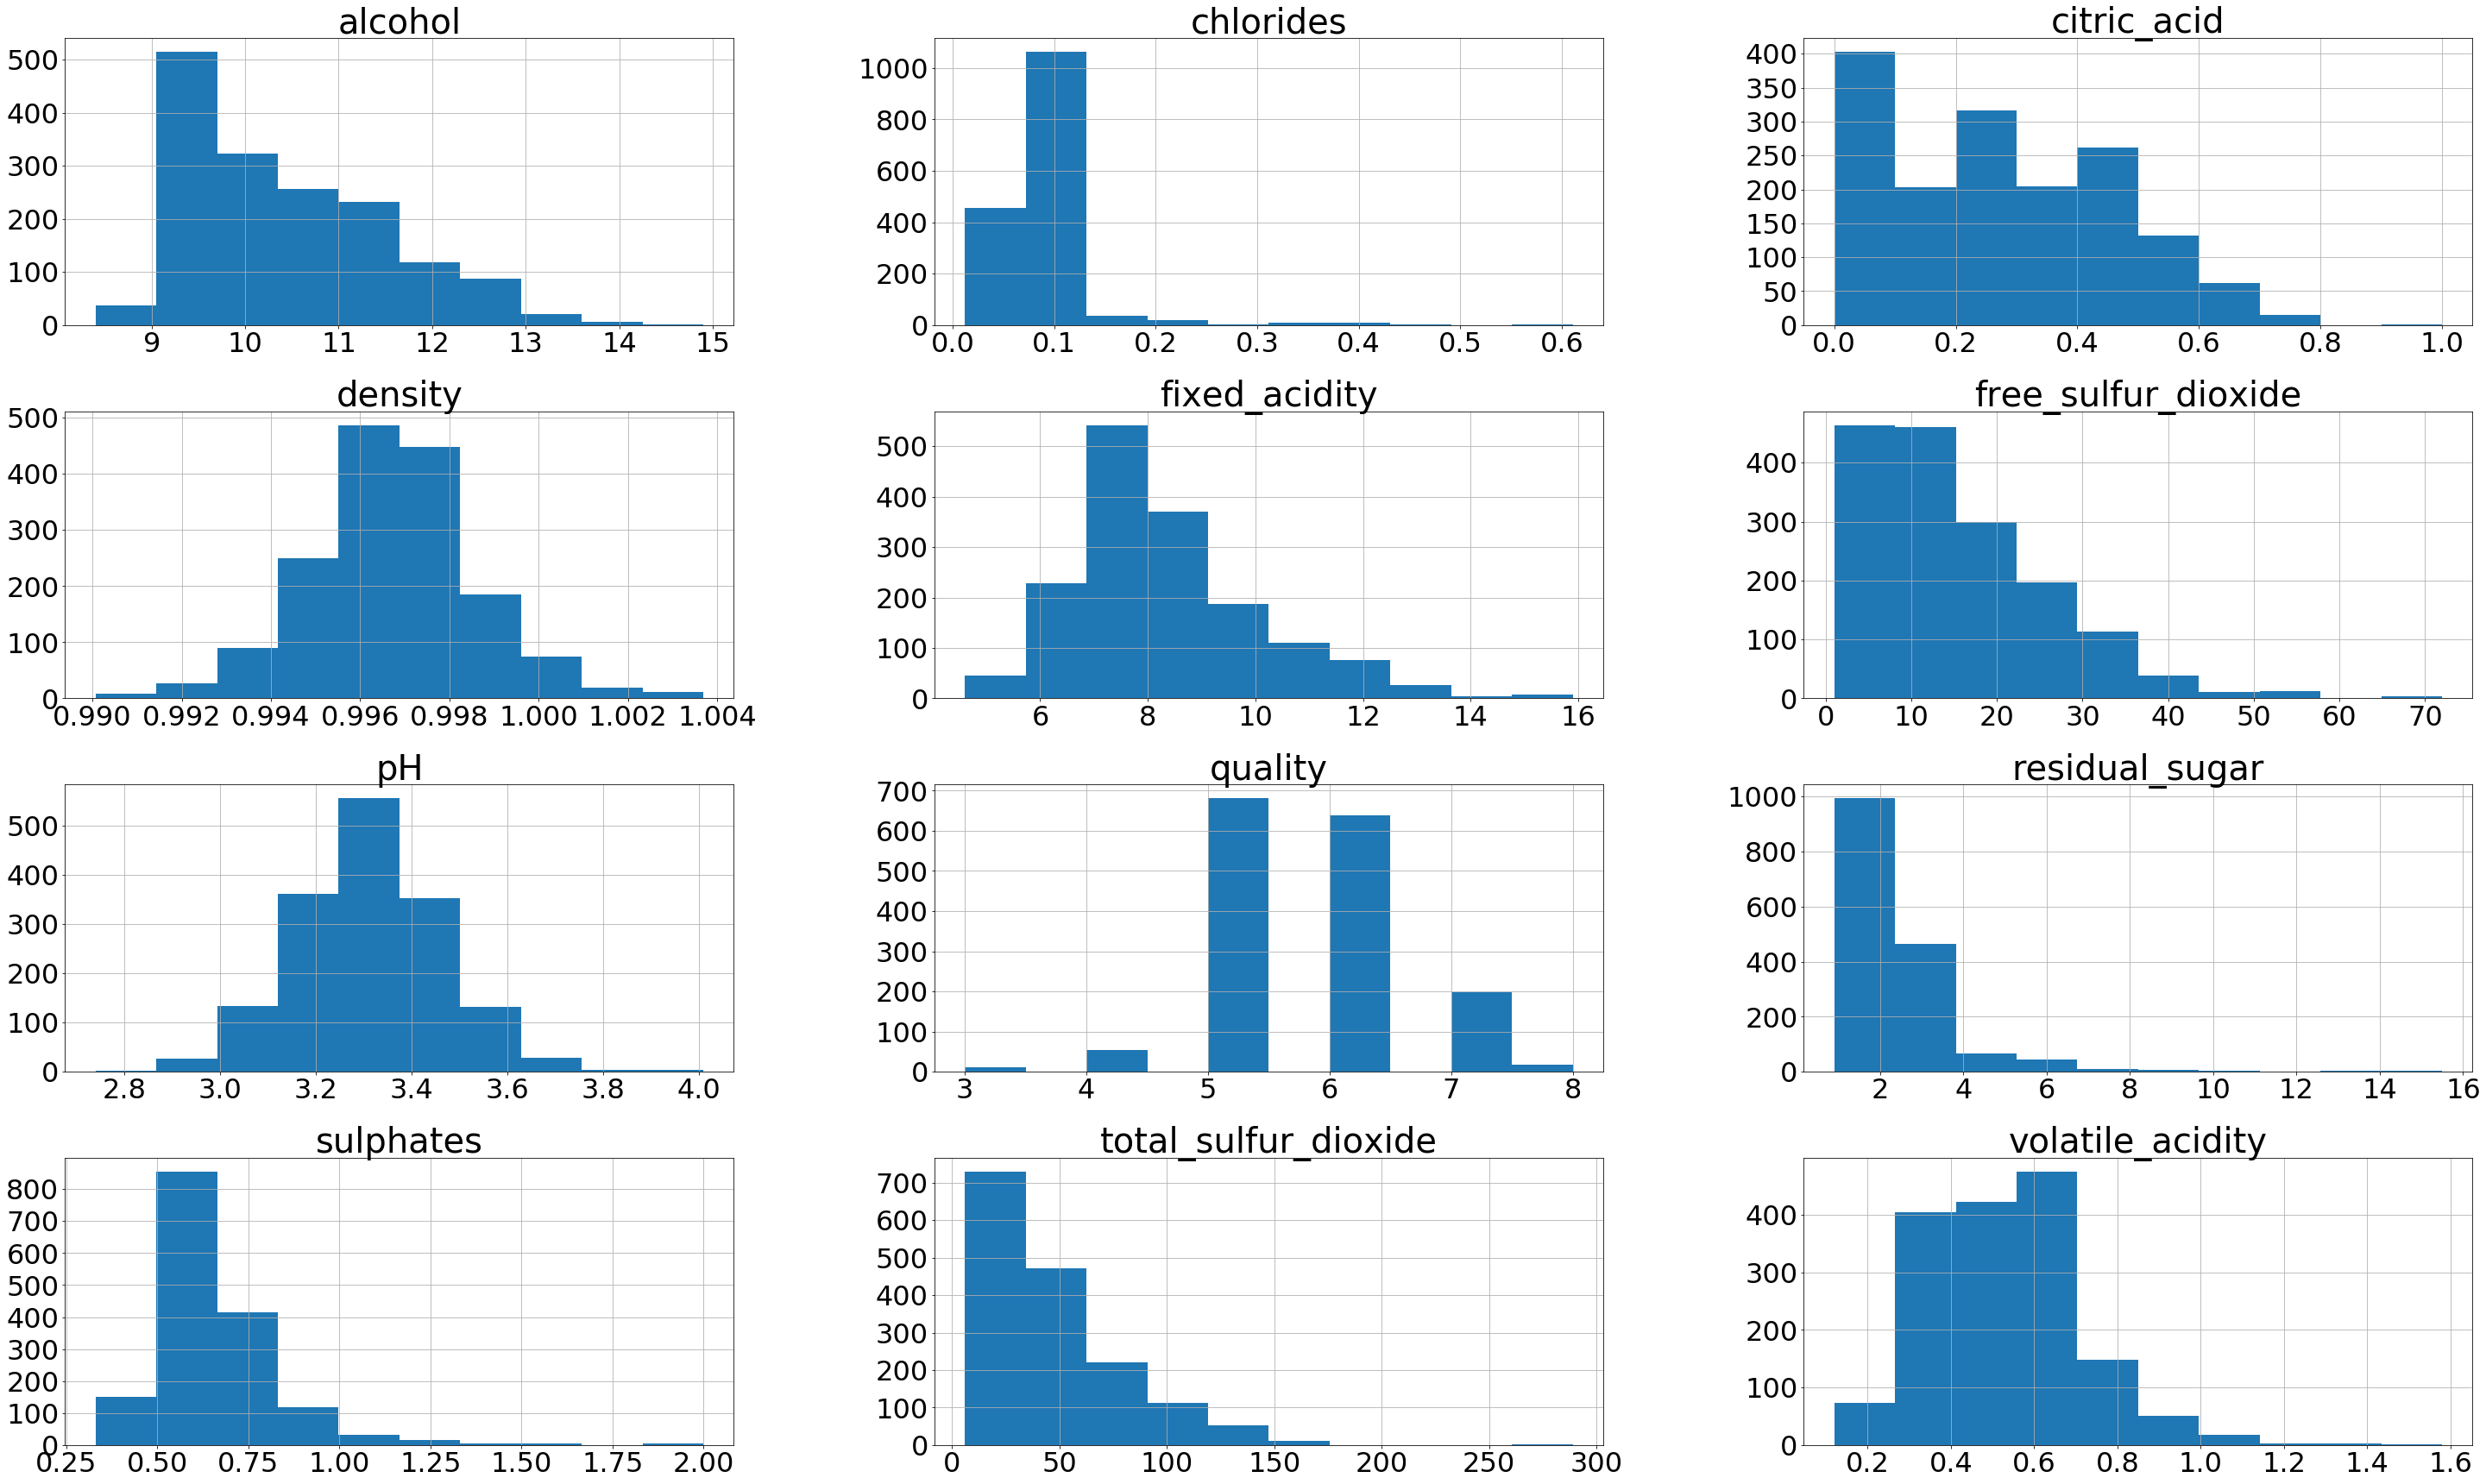

In [5]:
#como cada variavel ta distribuida
params = {'axes.titlesize':'40'}
plt.rcParams.update(params)
red.hist(figsize=(50, 30), xlabelsize= 32, ylabelsize = 32)

In [6]:
red_2 = red.copy()

In [7]:
#classificação em diferentes classes para facilitar a visualização
def label(row):
    if row['quality'] == 3 or row['quality'] == 4:
        return 'poor'
    elif row['quality'] == 5 or row['quality'] == 6:
        return 'normal'
    else:
        return 'excellent'

In [8]:
red_2['classe'] = red_2.apply(lambda row:label(row) ,axis =1)

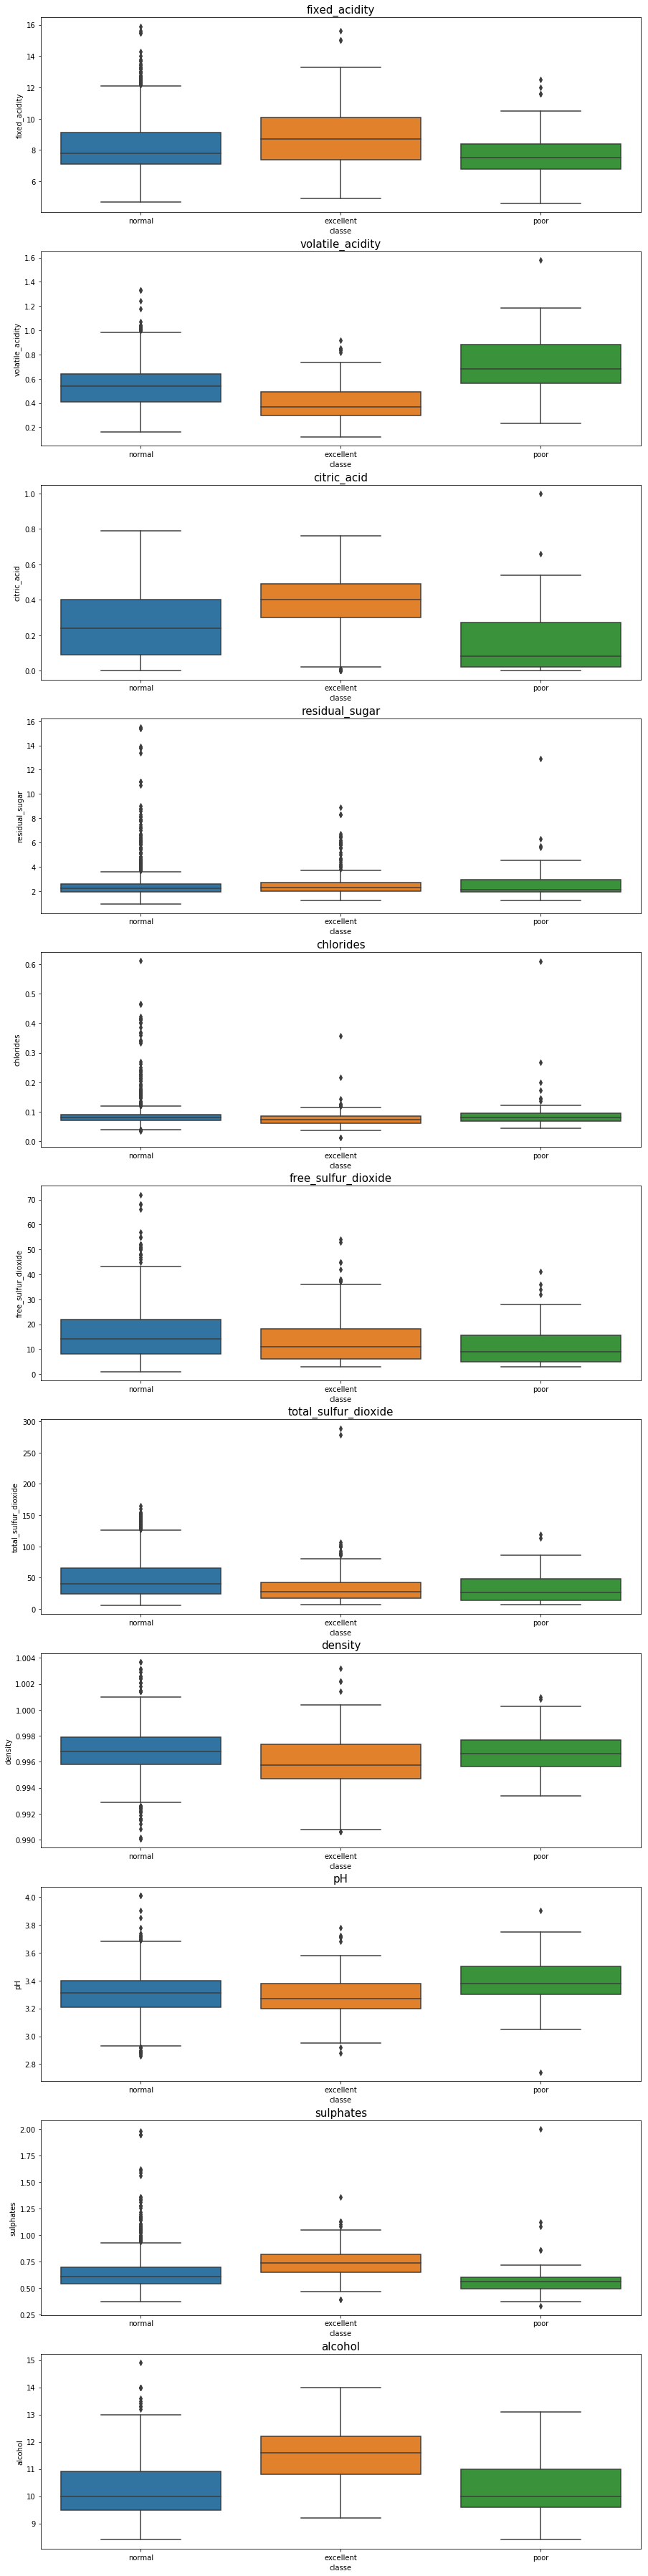

In [9]:
#quanto de cada classe tem em cada variavel
f, axes = plt.subplots(11, 1, figsize=(15, 65))
for ax, feature in zip(axes.flat, red_2.columns):
    sns.boxplot(y = red_2[feature], ax=ax, x = red_2['classe']).set_title(feature, fontsize = 15)


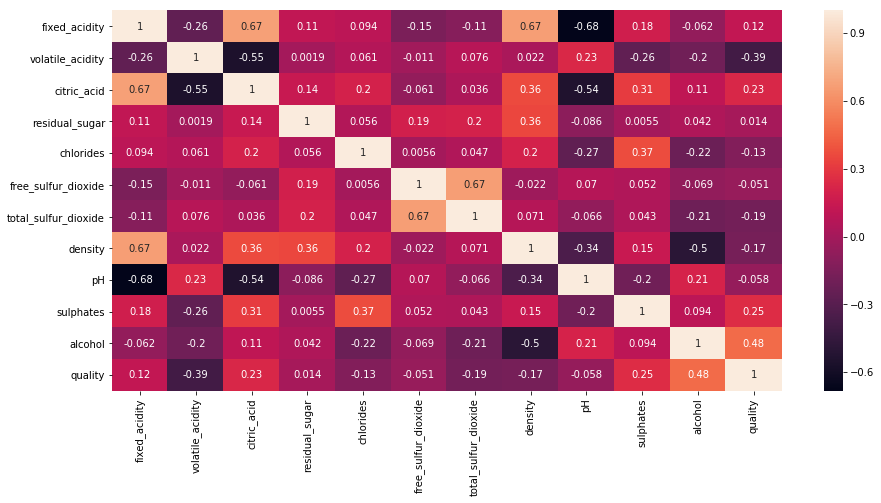

In [10]:
#correlação entre as variáveis
plt.figure(figsize=(15,7))
sns.heatmap(red_2.corr(), annot = True)

In [ ]:
#alguns valores são interessantes:
#fixed_acidicty x citric_acid = 0.67 
#fixed_acidity x density = 0.67 
#Density x Alcohol = - 0.5
#residual sugar x density = 0.36 
#density x ph = -0.34

Text(0.5, 1.0, 'Citric Acid x Fixed Acidity')

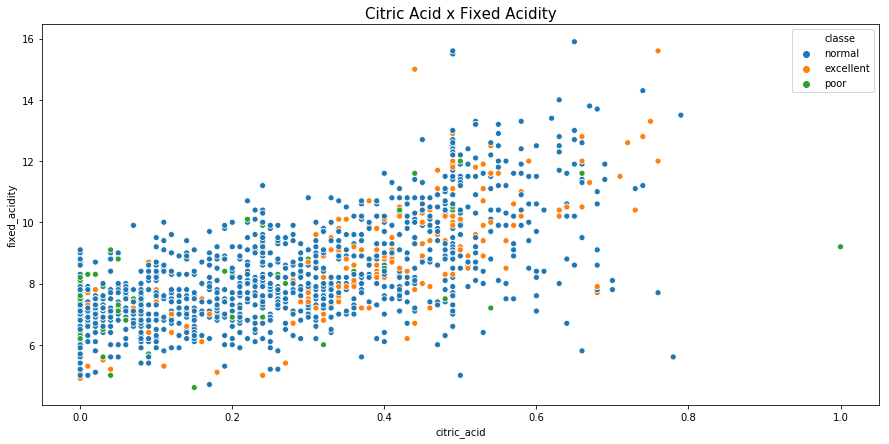

In [26]:
plt.figure(figsize=(15,7))

sns.scatterplot(x = 'citric_acid', y ='fixed_acidity', hue = 'classe', data= red_2).set_title("Citric Acid x Fixed Acidity", 
                                                                                              fontsize = 15)

Text(0.5, 1.0, 'Density x Fixed Acidity')

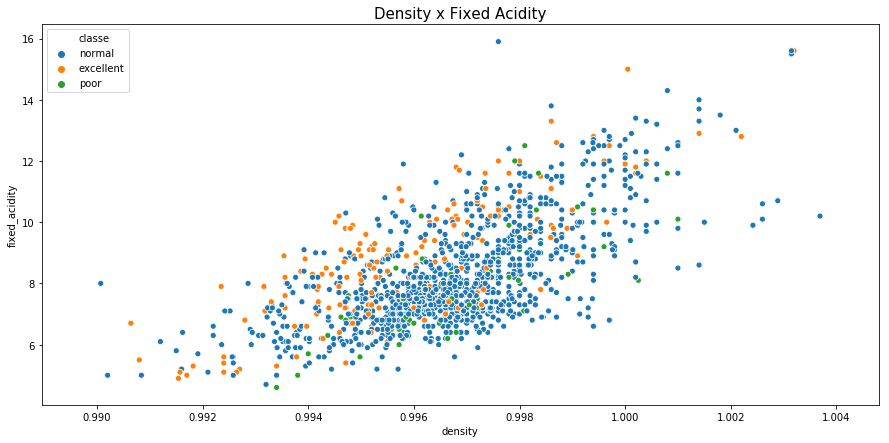

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'density', y ='fixed_acidity', hue = 'classe', data= red_2).set_title("Density x Fixed Acidity", 
                                                                                              fontsize = 15)

Text(0.5, 1.0, 'Density x Residual Sugar')

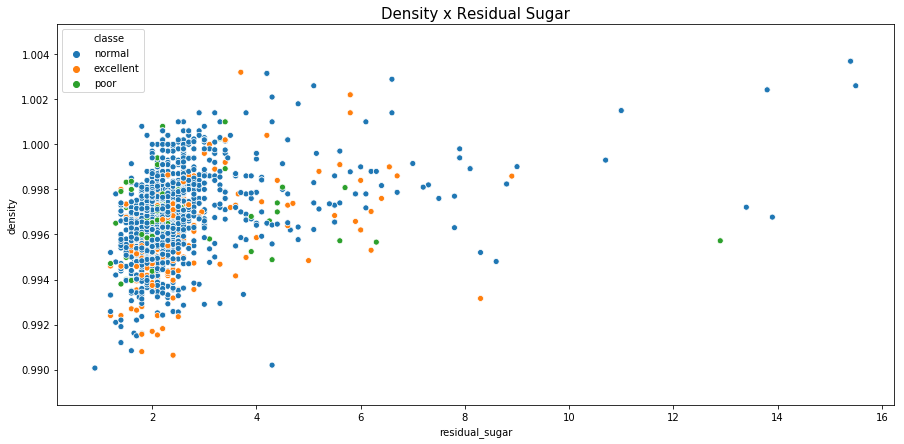

In [24]:
plt.figure(figsize=(15,7))
sns.scatterplot(y = 'density', x ='residual_sugar', hue = 'classe', data= red_2).set_title("Density x Residual Sugar", 
                                                                                              fontsize = 15)

Text(0.5, 1.0, 'Density x Alcohol')

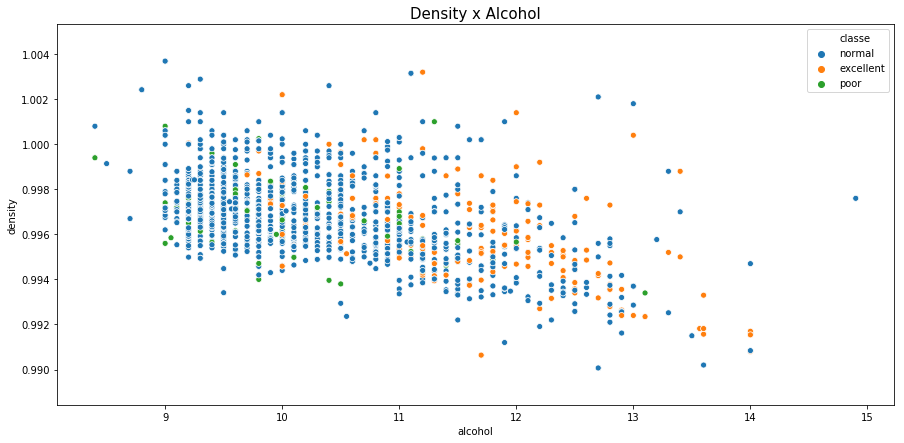

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'alcohol', y ='density', hue = 'classe', data= red_2).set_title("Density x Alcohol", fontsize = 15)

Text(0.5, 1.0, 'Density x pH')

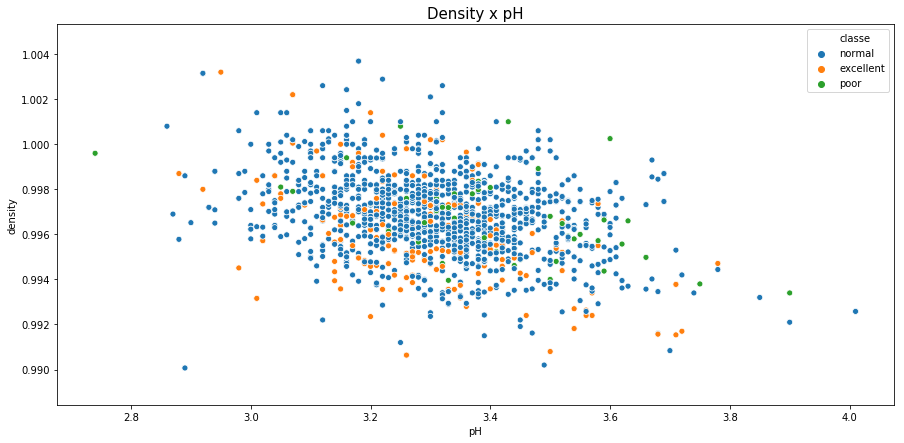

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = 'pH', y ='density', hue = 'classe', data= red_2).set_title("Density x pH", fontsize = 15)

In [ ]:
#ml

In [11]:
# Define random state
random_state = 2018
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [12]:
#reclassifica a qualidade para não ter problemas durante a execução do modelo
def label(row):
    if row['quality'] == 3 or row['quality'] == 4:
        return 1
    elif row['quality'] == 5 or row['quality'] == 6:
        return 2
    else:
        return 3

red_2['classe'] = red_2.apply(lambda row:label(row) ,axis =1)
red_2.groupby('classe').size()

classe
1      63
2    1319
3     217
dtype: int64

In [13]:
# as classes estão desbalanceadas, então é necessário balancear para depois rodar o modelo
# o cript está disponivel em: https://github.com/msahamed/handle_imabalnce_class/blob/master/imbalance_datasets_machine_learning.ipynb
class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        no_class = len(np.unique(y))

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, 
                                     random_state = random_state).split(X, y))

        train_proba = np.zeros((X.shape[0], no_class))
        test_proba = np.zeros((T.shape[0], no_class))
        
        train_pred = np.zeros((X.shape[0], len(self.base_models)))
        test_pred = np.zeros((T.shape[0], len(self.base_models)* self.n_splits))
        f1_scores = np.zeros((len(self.base_models), self.n_splits))
        recall_scores = np.zeros((len(self.base_models), self.n_splits))
        
        test_col = 0
        for i, clf in enumerate(self.base_models):
            
            for j, (train_idx, valid_idx) in enumerate(folds):
                
                X_train = X[train_idx]
                Y_train = y[train_idx]
                X_valid = X[valid_idx]
                Y_valid = y[valid_idx]
                
                clf.fit(X_train, Y_train)
                
                valid_pred = clf.predict(X_valid)
                recall  = recall_score(Y_valid, valid_pred, average='macro')
                f1 = f1_score(Y_valid, valid_pred, average='macro')
                
                recall_scores[i][j] = recall
                f1_scores[i][j] = f1
                
                train_pred[valid_idx, i] = valid_pred
                test_pred[:, test_col] = clf.predict(T)
                test_col += 1
                
                ## Probabilities
                valid_proba = clf.predict_proba(X_valid)
                train_proba[valid_idx, :] = valid_proba
                test_proba  += clf.predict_proba(T)
                
                print( "Model- {} and CV- {} recall: {}, f1_score: {}".format(i, j, recall, f1))
                
            test_proba /= self.n_splits
            
        return train_proba, test_proba, train_pred, test_pred

In [14]:
class_weight = dict({1:180, 2:1.9, 3:35})

rdf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False,
            random_state=random_state,
            verbose=0, warm_start=False)

In [15]:
base_models = [rdf]
n_splits = 5
lgb_stack = Create_ensemble(n_splits = n_splits, base_models = base_models)        


In [16]:
y=red_2.classe
x=red_2.drop(['classe'],axis=1)

xtrain,x_test,ytrain,y_test=train_test_split(x,y,test_size=0.33, random_state=0, stratify=y)

In [17]:
train_proba, test_proba, train_pred, test_pred = lgb_stack.predict(xtrain, ytrain, x_test)

Model- 0 and CV- 0 recall: 0.9770114942528735, f1_score: 0.9862225789192082
Model- 0 and CV- 1 recall: 0.9029374201787994, f1_score: 0.9427041766427241
Model- 0 and CV- 2 recall: 0.9583333333333334, f1_score: 0.9768388106416275
Model- 0 and CV- 3 recall: 0.9166666666666666, f1_score: 0.9505082932049224
Model- 0 and CV- 4 recall: 0.9885057471264368, f1_score: 0.9932077597203585


In [18]:
print('1. The F-1 score of the model {}\n'.format(f1_score(ytrain, train_pred, average='macro')))
print('2. The recall score of the model {}\n'.format(recall_score(ytrain, train_pred, average='macro')))
print('3. Classification report \n {} \n'.format(classification_report(ytrain, train_pred)))
print('4. Confusion matrix \n {} \n'.format(confusion_matrix(ytrain, train_pred)))

1. The F-1 score of the model 0.9711802347158304

2. The recall score of the model 0.9488232074438971

3. Classification report 
               precision    recall  f1-score   support

           1       1.00      0.88      0.94        42
           2       0.99      1.00      0.99       884
           3       1.00      0.97      0.98       145

   micro avg       0.99      0.99      0.99      1071
   macro avg       1.00      0.95      0.97      1071
weighted avg       0.99      0.99      0.99      1071
 

4. Confusion matrix 
 [[ 37   5   0]
 [  0 884   0]
 [  0   5 140]] 

